In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as statsfrom 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
df = pd.read_csv('Data Sheet - Sheet1.csv')

In [22]:
df.head()

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet


In [27]:
df.isnull().sum()

Crash_Severity            0
Vehicle_Speed             0
Crash_Time                0
Age                       0
Gender                    0
Vehicle_Type              0
Number_of_Lanes           0
Lane_Width                0
Road_Type                 0
Alcohol_Consumption       0
Crash_Type                0
Seatbelt_Usage            0
Speed_Limit               0
Road_Surface_Condition    0
dtype: int64

In [33]:
def plot_qq(data, feature_name):
    plt.figure(figsize=(6,6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature_name}')
    plt.show()

## Plots for continuous variables

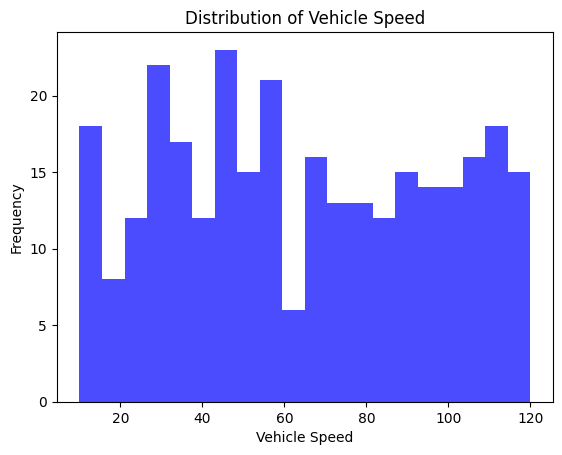

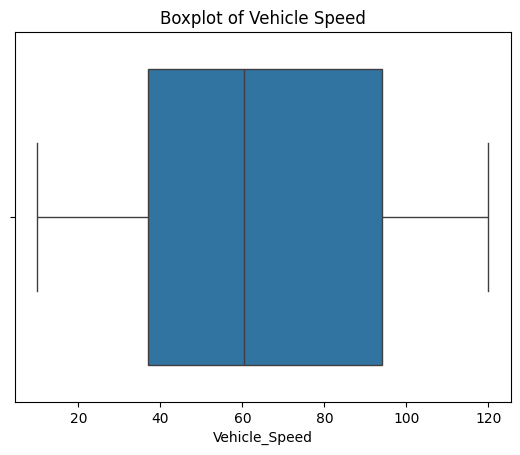

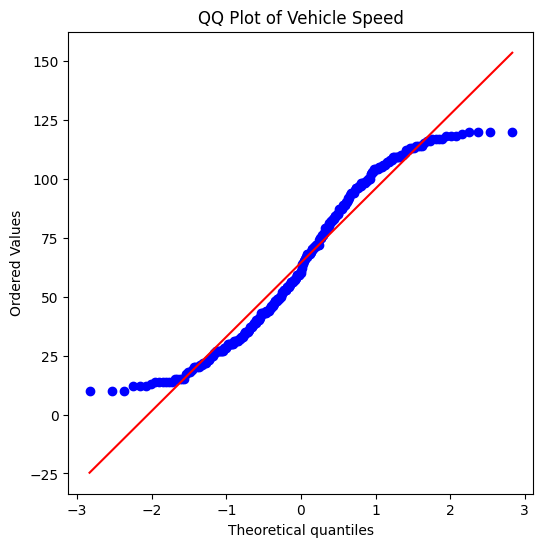

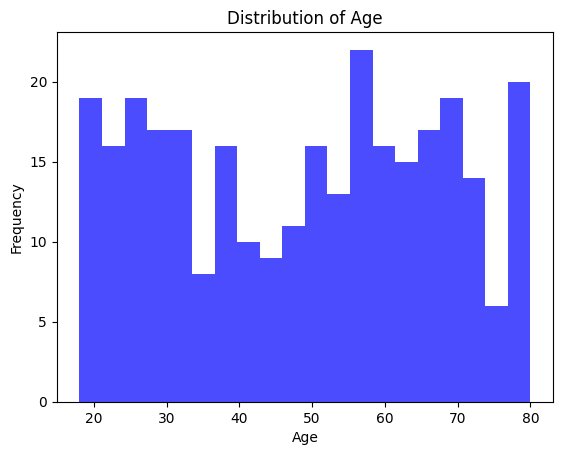

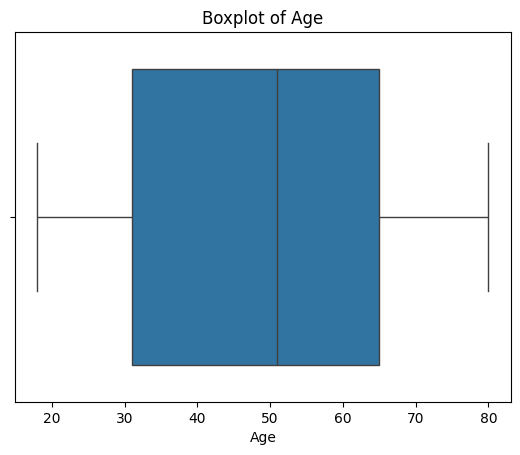

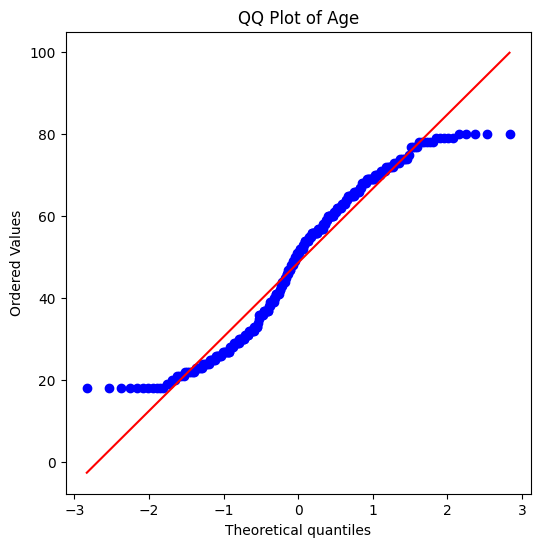

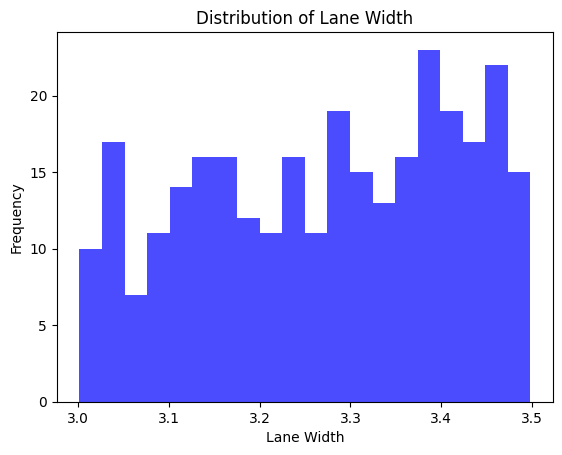

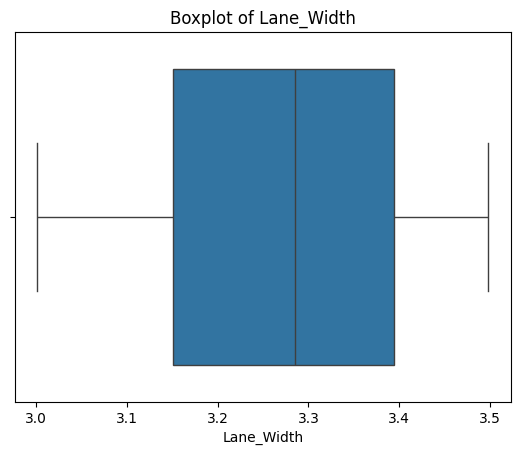

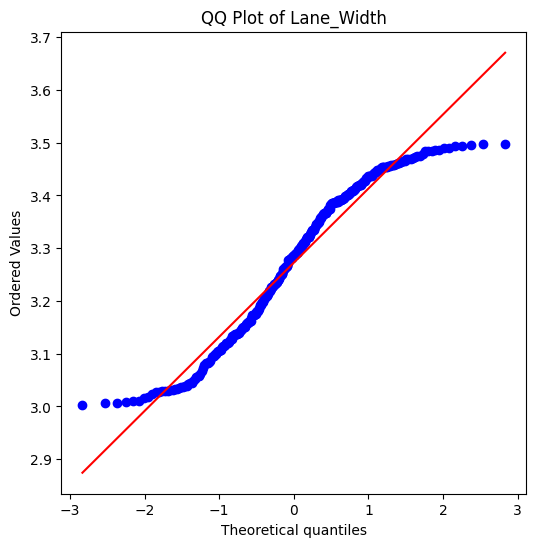

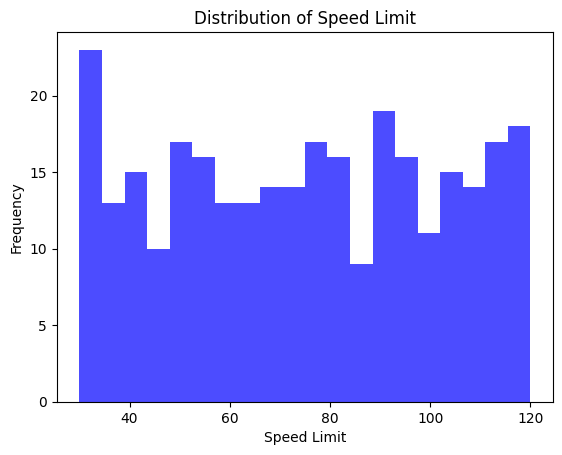

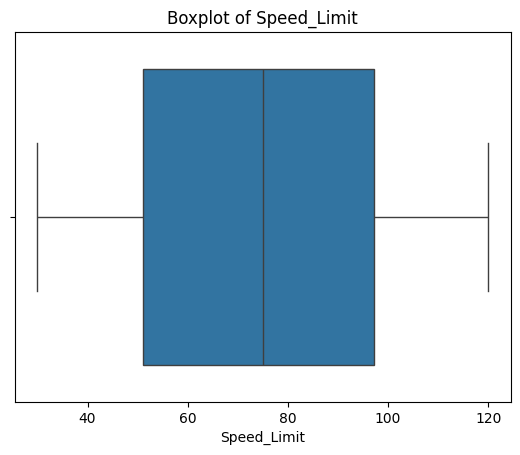

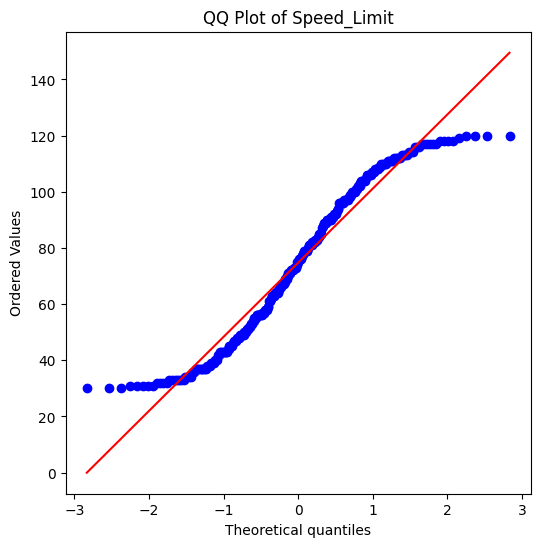

In [39]:
# Plot for Vehicle Speed
plt.hist(df['Vehicle_Speed'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=df['Vehicle_Speed'])
plt.title('Boxplot of Vehicle Speed')
plt.show()
plot_qq(df['Vehicle_Speed'], 'Vehicle Speed')
# Plot for Age
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()
plot_qq(df['Age'], 'Age')
# Plot for Lane Width
plt.hist(df['Lane_Width'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Lane Width')
plt.xlabel('Lane Width')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=df['Lane_Width'])
plt.title('Boxplot of Lane_Width')
plt.show()
plot_qq(df['Lane_Width'], 'Lane_Width')
# Plot for Speed Limit
plt.hist(df['Speed_Limit'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=df['Speed_Limit'])
plt.title('Boxplot of Speed_Limit')
plt.show()
plot_qq(df['Speed_Limit'], 'Speed_Limit')


<Figure size 1200x800 with 0 Axes>

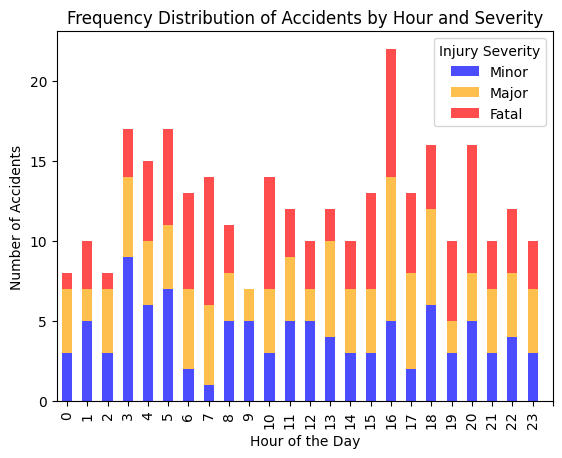

In [48]:
severity_distribution = df.groupby(['Crash_Time', 'Crash_Severity']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
severity_distribution.plot(kind='bar', stacked=True, color=['blue', 'orange', 'red'], alpha=0.7)
plt.title('Frequency Distribution of Accidents by Hour and Severity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Injury Severity', labels=['Minor', 'Major', 'Fatal'])
plt.xticks(range(0, 25))  
plt.show()

In [59]:
categorical_columns = ['Gender', 'Vehicle_Type', 'Road_Type', 'Alcohol_Consumption', 'Crash_Type', 'Seatbelt_Usage', 'Road_Surface_Condition']
encoder = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns as they are (non-categorical)
)

# Apply the transformation to the DataFrame
df = preprocessor.fit_transform(df)

# Convert the result back to a DataFrame
df= pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

# Show the first few rows of the transformed DataFrame
print(df.head())


  cat__Gender_Male cat__Vehicle_Type_Heavy Vehicle cat__Vehicle_Type_T.W  \
0              1.0                             1.0                   0.0   
1              1.0                             0.0                   0.0   
2              0.0                             0.0                   0.0   
3              0.0                             1.0                   0.0   
4              1.0                             0.0                   1.0   

  cat__Road_Type_Urban cat__Alcohol_Consumption_Yes cat__Crash_Type_Rear-end  \
0                  1.0                          1.0                      1.0   
1                  0.0                          1.0                      1.0   
2                  1.0                          0.0                      1.0   
3                  0.0                          0.0                      1.0   
4                  1.0                          1.0                      1.0   

  cat__Seatbelt_Usage_Yes cat__Road_Surface_Condition_Icy  \
0

In [68]:
severity_mapping = {
    'Minor injury': 1,
    'Major injury': 2,
    'Fatal injury': 3
}

# Apply the mapping to the 'Crash_Severity' column
df['remainder__Crash_Severity'] = df['remainder__Crash_Severity'].map(severity_mapping)

In [69]:
print(df.columns)

Index(['cat__Gender_Male', 'cat__Vehicle_Type_Heavy Vehicle',
       'cat__Vehicle_Type_T.W', 'cat__Road_Type_Urban',
       'cat__Alcohol_Consumption_Yes', 'cat__Crash_Type_Rear-end',
       'cat__Seatbelt_Usage_Yes', 'cat__Road_Surface_Condition_Icy',
       'cat__Road_Surface_Condition_Wet', 'remainder__Crash_Severity',
       'remainder__Vehicle_Speed', 'remainder__Crash_Time', 'remainder__Age',
       'remainder__Number_of_Lanes', 'remainder__Lane_Width',
       'remainder__Speed_Limit'],
      dtype='object')


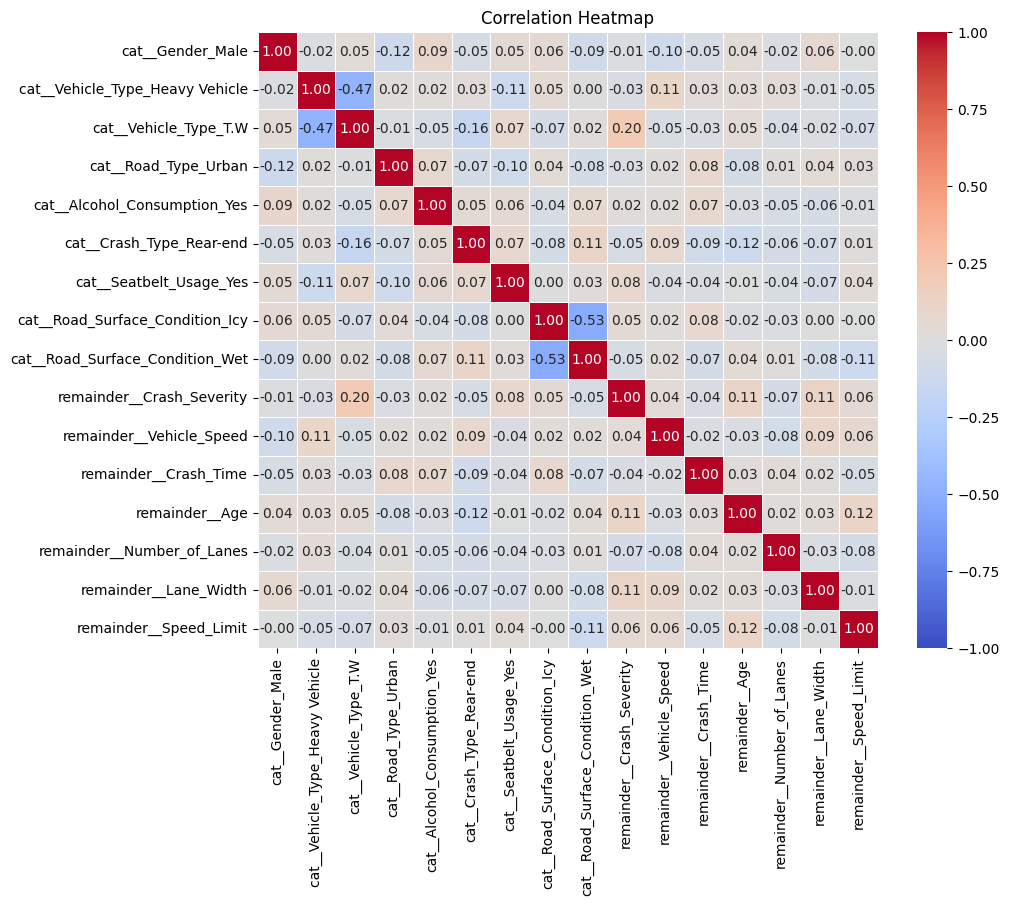

In [70]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()